<a href="https://colab.research.google.com/github/andreaafs/MVP-Machine-Learning-Analytics/blob/main/MVP_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP: Previsão de Risco de Doenças Cardíacas

## 1. Escopo, Objetivo e Definição do Problema
- Objetivo: prever risco de doenças cardíacas (classificação binária: sim/não)
- Hipóteses iniciais: idade, pressão, colesterol e histórico familiar influenciam mais.
- Restrições: dataset público, sem dados clínicos sensíveis.

O conjunto de dados foi obtido por amostragem e adaptação do conjunto de dados original do Kaggle. Cada linha no conjunto de dados corresponde a um indivíduo diferente. Algumas colunas são as respostas a perguntas feitas aos entrevistados sobre seu estado de saúde, como:

"Você tem sérias dificuldades para andar ou subir escadas?" ou "Você fumou pelo menos 100 cigarros em toda a sua vida? O alvo é a variável Doença Cardíaca, que indica se os entrevistados que já relataram ter doença coronariana (DAC) ou infarto do miocárdio.


***OBS:*** Foram excluídas muitas linhas, pois não consegui carregar o dataset completo para o guithub


## 2. Reprodutibilidade e Ambiente

In [ ]:
Importação de pacotes
import pandas as pd  # Series and DataFrames
import numpy as np  # linear algebra
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import math
import sweetviz as sv

# nltk
import nltk
import ast
import random
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from matplotlib import cm
from plotly.subplots import make_subplots
from sklearn import model_selection # model assesment and model selection strategies
from sklearn import metrics # model evaluation metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression


# visualization
from wordcloud import WordCloud
colors = ['#494BD3', '#E28AE2', '#F1F481', '#79DB80', '#DF5F5F',
              '#69DADE', '#C2E37D', '#E26580', '#D39F49', '#B96FE3']
from plotly.offline import init_notebook_mode, iplot

from dython.nominal import associations

pd.set_option('display.max_columns', None)
# from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format


In [ ]:
import numpy as np
import random
import torch
np.random.seed(42)
random.seed(42)
torch.manual_seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay



## 3. Dados: Carga, Entendimento e Qualidade

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'HeartDisease_FamilyHistory',
       'State'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303944 entries, 0 to 303943
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   target                      303943 non-null  object 
 1   BMI                         303943 non-null  float64
 2   Smoking                     303944 non-null  object 
 3   AlcoholDrinking             202440 non-null  object 
 4   Stroke                      302875 non-null  object 
 5   PhysicalHealth              303943 non-null  float64
 6   MentalHealth                303943 non-null  float64
 7   DiffWalking             

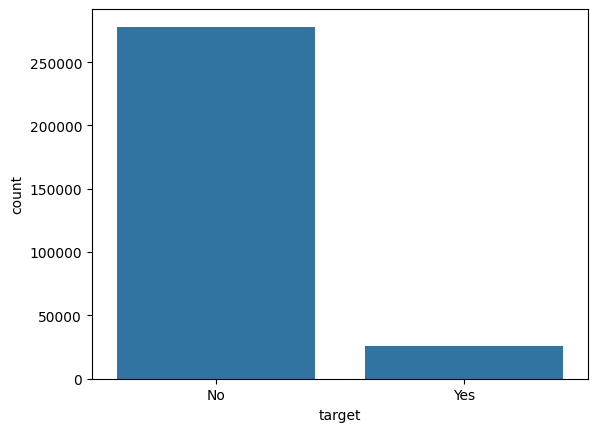

In [ ]:
# Carregar dataset direto do GitHub
url = "https://raw.githubusercontent.com/andreaafs/MVP-Machine-Learning-Analytics/refs/heads/main/heart_disease_data2.csv"
df = pd.read_csv(url)

# Conferir colunas e renomear target caso necessário
print(df.columns)

# Definir a primeira coluna 'HeartDisease' como target
target_col = df.columns[0]
df.rename(columns={target_col: 'target'}, inplace=True)

print(df.info())
print(df.describe())
print(df.isnull().sum())
sns.countplot(x='target', data=df)
plt.show()

In [ ]:
df.head(5).T

,0,1,2,3,4
target,No,Yes,No,No,No
BMI,57.02,26.43,27.63,22.81,24.33
Smoking,No,Yes,No,No,No
AlcoholDrinking,No,No,No,NaN,NaN
Stroke,No,No,No,No,No
PhysicalHealth,30.0,30.0,0.0,0.0,0.0
MentalHealth,30.0,15.0,0.0,0.0,0.0
DiffWalking,Yes,Yes,No,No,No
Sex,Female,Female,Female,Female,Male
AgeCategory,35-39,70-74,80 or older,35-39,18-24


## 4. Definição do Target, Variáveis e Divisão dos Dados

In [ ]:
df.tail(5).T

,303939,303940,303941,303942,303943
target,No,Yes,No,No,No
BMI,33.66,30.65,30.13,25.79,36.58
Smoking,No,Yes,No,No,No
AlcoholDrinking,NaN,NaN,NaN,Yes,No
Stroke,No,No,No,No,No
PhysicalHealth,0.0,2.0,0.0,0.0,30.0
MentalHealth,0.0,0.0,0.0,0.0,15.0
DiffWalking,No,No,No,No,Yes
Sex,Female,Female,Male,Male,Female
AgeCategory,30-34,65-69,25-29,80 or older,60-64


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,303943.0,28.317310,6.366342,12.02,24.03,27.32,31.38,119.0
PhysicalHealth,303943.0,3.363900,7.942834,0.00,0.00,0.00,2.00,30.0
MentalHealth,303943.0,3.904420,7.956124,0.00,0.00,0.00,3.00,30.0
SleepTime,303943.0,7.097518,1.433978,1.00,6.00,7.00,8.00,24.0


ANALISANDO OS DADOS

In [ ]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303944 entries, 0 to 303943
Columns: 20 entries, target to State
dtypes: float64(4), object(16)
memory usage: 46.4+ MB


In [ ]:
df.columns

Index(['target', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'HeartDisease_FamilyHistory',
       'State'],
      dtype='object')

**Desscrição da tabela:**

Explicação Variável



*   HeartDisease: Respondents that have ever reported having coronary heart disease
*  (CHD) or myocardial infarction (MI)
*   BMI: Body Mass Index (BMI)a
*   Smoking: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
*   AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
*  Stroke: (Ever told) (you had) a stroke?
*  PhysicalHealth: Now thinking about your physical health
*  MentalHealth: Thinking about your mental health
*  DiffWalking: Do you have serious difficulty walking or climbing stairs?
*  Sex: Are you male or female?
*  AgeCategory: Fourteen-level age category
*  Race: Imputed race/ethnicity value
*  Diabetic: (Ever told) (you had) diabetes?
*  PhysicalActivityv: Adults who reported doing physical activity or exercise
during the past 30 days other than their regular job
*  GenHealth: Would you say that in general your health is Good/Very Good/…
*  SleepTime: On average
*  Asthma: (Ever told) (you had) asthma?
*  KidneyDisease: Not including kidney stones
*  SkinCancer: (Ever told) (you had) skin cancer?
*  HeartDisease_FamilyHistory: Do you have family history of heart disease?
*  State: US sate (residency)




In [12]:
df.head(4)

,target,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease_FamilyHistory,State
0,No,57.02,No,No,No,30.0,30.0,Yes,Female,35-39,White,No,No,Poor,9.0,No,No,No,NaN,TX
1,Yes,26.43,Yes,No,No,30.0,15.0,Yes,Female,70-74,White,Yes,No,Poor,6.0,No,Yes,No,NaN,AK
2,No,27.63,No,No,No,0.0,0.0,No,Female,80 or older,White,No,No,Excellent,9.0,No,No,No,NaN,SC
3,No,22.81,No,NaN,No,0.0,0.0,No,Female,35-39,White,No,Yes,Good,6.0,No,Yes,No,NaN,AZ


In [13]:
print("Total de linhas do dataframe : ",df.shape[0])

Total de linhas do dataframe :  303944


In [1]:
!pip install numpy==1.23.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 56.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [16]:
!pip install sweetviz
import sweetviz as sv

In [19]:
!pip install pandas-profiling
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("pandas_profiling_report.html")


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 14.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b2bd5b826250d28bb5e4ccca0e47ae313f5914e4d7d22b1c70691834b02cd0ce
  Stored in directory: /root/.cache/pip/wheels/5f/d4/d7/4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
  Attempting uninstall: 

AttributeError: module 'numba' has no attribute 'generated_jit'

In [ ]:
X = df.drop('target', axis=1)
y = df['target']
numerical_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## 5. Tratamento de Dados e Pipeline de Pré-processamento

In [ ]:
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[('num', num_transformer, numerical_cols), ('cat', cat_transformer, categorical_cols)])

## 6. Baseline e Modelos Candidatos

In [ ]:
baseline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DummyClassifier(strategy='most_frequent'))])
baseline.fit(X_train, y_train)
y_pred_base = baseline.predict(X_test)
print("Accuracy baseline:", accuracy_score(y_test, y_pred_base))

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(random_state=42)
}
for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.3f}, F1: {f1_score(y_test, y_pred):.3f}")

## 7. Validação e Otimização de Hiperparâmetros

In [ ]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5]
}
grid_search = GridSearchCV(
    Pipeline([('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))]),
    param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print("Melhores parâmetros:", grid_search.best_params_)

## 8. Avaliação Final, Análise de Erros e Limitações

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.show()

## 9. Engenharia de Atributos (Opcional)
# Exemplo: criar bins de idade
# df['age_bin'] = pd.cut(df['age'], bins=[29,40,50,60,70,80], labels=False)